# Nghiên cứu khoa học - Nhóm 5

## Đề tài: Ứng dụng phương pháp Monte-Carlo để xây dựng mô hình rủi ro tín dụng
## Thành viên: Trần Hoàng Đức - 22000089
## Duơng Đạt Khang - 22000099
## Trịnh Đức Huy - 22000097

## 1. Chuẩn bị dữ liệu
a) Nhập thư viện cần thiết

In [1]:
!pip install dask[complete]
!pip install dask-ml

In [2]:
import numpy as np
import pandas as pd

b) Đọc dữ liệu từ file csv

 Nhóm thống nhất sử dụng dataset chứa dữ liệu của hơn 460000 khoản vay của khách hàng từ năm 2007 đến năm 2014 của Lending Club. Dataset này được lấy trên Kaggle, cụ thể: https://www.kaggle.com/datasets/devanshi23/loan-data-2007-2014

In [3]:
loan_data_backup = pd.read_csv('D:/credit-risk-modeling-in-python-master/Dataset/loan_data_2007_2014.csv', 
                                low_memory=False) # Cần khắc phục cái low-memory = False
loan_data = loan_data_backup.copy()

c) In ra thông tin của dữ liệu

In [4]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [5]:
# Hiển thị tất cả các cột
pd.options.display.max_columns = None

In [6]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [7]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
loan_data.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
# Hiển thị cột của dữ liệu
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [10]:
# Hiển thị thông tin (tên cột, số lượng dữ liệu không kể null và kiểu dữ liệu của cột) của dữ liệu
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## 2. Tiền xử lý dữ liệu
a) Tiền xử lý một số biến liên tục

In [11]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace(r'\+ years', '')  # Correctly removes "+ years"
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

# Xóa dấu "+" nếu vẫn còn
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('+', '')

loan_data.emp_length_int = pd.to_numeric(loan_data.emp_length_int)
loan_data.emp_length_int.describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

In [13]:
loan_data.emp_length_int = pd.to_numeric(loan_data.emp_length_int)
loan_data.emp_length_int.describe()

count    445277.000000
mean          5.993330
std           3.627044
min           0.000000
25%           3.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length_int, dtype: float64

In [14]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data.term_int.value_counts()

term_int
36    337953
60    128332
Name: count, dtype: int64

In [15]:
loan_data.term_int = pd.to_numeric(loan_data.term_int)
loan_data.term_int[0]


np.int64(36)

In [16]:
loan_data.earliest_cr_line

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data.earliest_cr_line,format='%b-%y')
loan_data.earliest_cr_line_date

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [18]:
# Tính đến ngày 01/11/2024
pd.to_datetime('2024-11-01') - loan_data.earliest_cr_line_date

0        14549 days
1         9346 days
2         8401 days
3        10501 days
4        10532 days
            ...    
466280    7885 days
466281   10015 days
466282    8371 days
466283    7944 days
466284    9040 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [19]:
loan_data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['earliest_cr_line_date'])).dt.days / 30.44)


In [20]:
loan_data['mths_since_earliest_cr_line'].describe()
# quan sát giá trị nhỏ nhất

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
loan_data.mths_since_earliest_cr_line.max()

np.float64(587.0)

In [22]:
loan_data.loc[loan_data.mths_since_earliest_cr_line < 0, 'mths_since_earliest_cr_line'] = loan_data.mths_since_earliest_cr_line.max()


In [23]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [24]:
loan_data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - pd.to_datetime(loan_data['issue_d'], format='%b-%y')).dt.days / 30.44)

b) Tiền xử lý một số biến rời rạc

Cụ thể, là các biến: grade, sub_grade,home_ownership, verification_status, loan_status, purpose, addr_state, initial_list_status

In [25]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 80 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [26]:
# Đổi thành các category
pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ":")

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,False,True,False,False,False,False,False
1,False,False,True,False,False,False,False
2,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False
4,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...
466280,False,False,True,False,False,False,False
466281,False,False,False,True,False,False,False
466282,False,False,False,True,False,False,False
466283,True,False,False,False,False,False,False


In [27]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],prefix = 'grade', prefix_sep = ":"),
                    pd.get_dummies(loan_data['sub_grade'],prefix = 'sub_grade', prefix_sep = ":"),
                    pd.get_dummies(loan_data['home_ownership'],prefix = 'home_ownership', prefix_sep = ":"),
                    pd.get_dummies(loan_data['verification_status'],prefix = 'verification_status', prefix_sep = ":"),
                    pd.get_dummies(loan_data['loan_status'],prefix = 'loan_status', prefix_sep = ":"),
                    pd.get_dummies(loan_data['purpose'],prefix = 'purpose', prefix_sep = ":"),
                    pd.get_dummies(loan_data['addr_state'],prefix = 'addr_state', prefix_sep = ":"),
                    pd.get_dummies(loan_data['initial_list_status'],prefix = 'initial_list_status', prefix_sep = ":")]

In [28]:
loan_data_dummies = pd.concat(loan_data_dummies,axis = 1)

In [29]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [30]:
loan_data = pd.concat([loan_data,loan_data_dummies],axis = 1)

In [31]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

c) Kiểm tra các giá trị null và dọn dẹp bảng

In [32]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [33]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

- Các cột chúng ta quan tâm để xây dựng mô hình: annual_inc,
delinq_2yrs,
inq_last_6mths,
open_acc,
pub_rec,
total_acc,
acc_now_delinq,
total_rev_hi_lim,
emp_length_int,
mths_since_earliest_cr_line.

Các cách xử lý giá trị thiếu:

1. Loại bỏ các quan sát có giá trị thiếu

2. Thay thế các giá trị bằng các phương pháp phù hợp khác

- Định nghĩa từ điển mà ta sử dụng để tiền xử lý:

total_rev_hi_lim: Đại diện cho tổng hạn mức tín dụng xoay vòng cao nhất. Nói cách khác, đây là số tiền tín dụng tối đa mà người vay có sẵn trên tất cả các tài khoản tín dụng xoay vòng của họ (như thẻ tín dụng).

- Nếu người vay không có bất kỳ tài khoản tín dụng xoay vòng nào, thì total_rev_hi_lim có thể bị thiếu. Trong trường hợp này, số tiền cho vay đã giải ngân có thể được coi là ước tính hợp lý về khả năng tín dụng tiềm năng của họ.

In [34]:
loan_data['total_rev_hi_lim'].head(3)

0   NaN
1   NaN
2   NaN
Name: total_rev_hi_lim, dtype: float64

In [35]:
# Nếu giá trị null thì thay bằng giá trị của cột funded_amnt
loan_data.loc[:, 'total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'])


In [36]:
loan_data['total_rev_hi_lim'].isnull().sum()

np.int64(0)

Tương tự, ta xử lý annual_inc

In [37]:
loan_data['annual_inc'].head()

0    24000.0
1    30000.0
2    12252.0
3    49200.0
4    80000.0
Name: annual_inc, dtype: float64

In [38]:
loan_data.annual_inc.isnull().sum()

np.int64(4)

In [39]:
# Nếu giá trị null thì thay bằng giá trị trung bình của cột annual_inc
loan_data.loc[:, 'annual_inc'] = loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean())


Với các cái cột còn lại:
mths_since_earliest_cr_line,
acc_now_delinq,
total_acc,
pub_rec,
open_acc,
inq_last_6mths,
delinq_2yrs,
emp_length_int,
ta sẽ gán giá trị 0 vào các cột đấy


In [40]:
for i in list(['acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']):
    loan_data.loc[:, i] = loan_data[i].fillna(0)

In [41]:
loan_data.loc[:,['acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']].isnull().sum()

acc_now_delinq    0
total_acc         0
pub_rec           0
open_acc          0
inq_last_6mths    0
delinq_2yrs       0
emp_length_int    0
dtype: int64

# 2. Chuẩn bị dữ liệu

Biến phụ thuộc: cột loan_status

Định nghĩa vỡ nợ (phổ biến): 90 ngày kể từ khi đến hạn đóng

Khoản vay gian lận cũng được coi là khoản vay vỡ nợ


### Hồi quy Logistics
Ước lượng quan hệ giữa hai loại,

\begin{equation*}
ln(odds) =
 \sum_{j=1}^m \beta_j X_j
\end{equation*}

trong trường hợp này ta có

\begin{equation*}
ln(\frac{Non-Defaults}{Defaults}) =
 \sum_{j=1}^m \beta_j X_j
\end{equation*}

### Các biến phụ thuộc : Định nghĩa Tốt / Xấu (vỡ nợ)




In [42]:
# Hiển thị các trạng thái nợ
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [43]:
# Hiên thị số lượng các trạng thái nợ
loan_data['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [44]:
# Tính tỉ lệ của các trạng thái nợ
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

loan_status
Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: count, dtype: float64

Chúng ta sẽ tạo biến để xác định khoản vay này là tốt hay xấu (1 là tốt, 0 là xấu)

In [45]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (31-120 days)']), 0 , 1)

### Các biến độc lập

#### Phân loại tốt
Nếu chúng ta có các giá trị từ 0 đến 100 và chúng ta có thể biến các biến liên tục/rời rạc thành các biến dạng category thì chúng ta gọi nó là phân loại tốt.

#### Weight of Evidence (Trọng số của bằng chứng)
Weight of Evidence là một trong những kĩ thuật tạo đặc trưng (feature engineering) và lựa chọn đặc trưng (feature selection) khá hiệu quả, thường được áp dụng trong quá trình xây dựng mô hình scorecard.

Trong trường hợp này, công thức để xác định trọng số là:
\begin{equation*}
WoE_i= ln\left(\frac{percentage-of-good_i}{percentage-of-bad_i}\right)
\end{equation*}




#### Coarse Classing
Khi chúng ta phân loại các biến liên tục/rời rạc thành các category không bằng nhau, ta gọi đấy là Coarse Classing.


#### Information Value (IV)
Information Value đo lường khả năng dự đoán của biến độc lập (biến đầu vào) đối với biến phụ thuộc (biến đầu ra). Information Value được xác định như sau:
\begin{equation*}
Information Value =   \sum_{i=1}^k \left(PercentageOfGood - PercentageOfBad \right) * \left(ln\left(\frac{percentage-of-good_i}{percentage-of-bad_i}\right) \right)
\end{equation*}
hoặc
\begin{equation*}
Information Value =   \sum_{i=1}^k \left(PercentageOfGood  - PercentageOfBad \right) * \left(WoE_i \right)
\end{equation*}

Giá trị của Information Value luôn nằm trong đoạn từ 0 đến 1.
Giá trị của Information Value có ảnh hưởng đến khả năng dự báo:
   
    0 < IV < 0.02: Không có khả năng dự báo 
   
    0.02 < IV < 0.1: Khả năng dự báo yếu
   
    0.1 < IV < 0.3: Khả năng dự báo trung bình
   
    0.3 < IV < 0.5: Khả năng dự báo mạnh
   
    0.5 < IV < 1 : Khả năng dự báo rất mạnh (thường là đáng nghi)



## 3. Tách dữ liệu để train model và thử nghiệm (Triển khai model)
Chúng ta sử dụng thư viện học máy scikit-learn (trước đây là sklearn).

In [46]:
# Nhập thư viện cần sử dụng
from sklearn.model_selection import train_test_split

In [47]:
# Chúng ta tách thành hai dataframes với input và target, từng cái thành một dataframe train và một dataframe test, rồi lưu chúng vào các biến
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])


In [48]:
# Trả số chiều và số phần tử trong từng chiều
loan_data_inputs_test.shape

(116572, 206)

In [49]:
loan_data_targets_test.shape

(116572,)

In [50]:
loan_data_inputs_train.shape

(349713, 206)

In [51]:
loan_data_targets_train.shape

(349713,)

In [52]:
# Làm tương tự như trên, nhưng lần này chúng ta sẽ để kích thước của test là 20% và train là 80%.
# Đồng thời, chúng ta cũng đặt một trạng thái ngẫu nhiên là 42. Như vậy, chúng ta có thể chạy bước tách này nhiều lần.
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)


In [53]:
loan_data_inputs_train.shape


(373028, 206)

In [54]:
loan_data_targets_train.shape


(373028,)

In [55]:
loan_data_inputs_test.shape


(93257, 206)

In [56]:
loan_data_targets_test.shape


(93257,)

## 4. Một ví dụ cụ thể để chuẩn bị dữ liệu

In [57]:
df_inputs_prepr = loan_data_inputs_train
df_targets_prepr = loan_data_targets_train

In [58]:
# Hiển thị các giá trị độc nhất của cột grade
df_inputs_prepr['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [59]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
# Ghép hai dataframes theo cột grade và good_bad
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [60]:
# Nhóm và đếm số lượng các giá trị của cột grade theo cột good_bad
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [61]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [62]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [63]:
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257
5,F,10530,F,0.754416
6,G,2654,G,0.727958


In [64]:
# Chọn cột với các index cụ thể
df1 = df1.iloc[:, [0, 1, 3]]
df1

,grade,good_bad,good_bad
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [65]:
# Đổi tên cột
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,59759,0.961044
1,B,109730,0.921015
2,C,100245,0.885770
3,D,61498,0.846304
4,E,28612,0.805257
5,F,10530,0.754416
6,G,2654,0.727958


In [66]:
# Chia lấy tỉ lệ và lưu vào biến mới
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59759,0.961044,0.160200
1,B,109730,0.921015,0.294160
2,C,100245,0.885770,0.268733
3,D,61498,0.846304,0.164862
4,E,28612,0.805257,0.076702
5,F,10530,0.754416,0.028228
6,G,2654,0.727958,0.007115


In [67]:
# Tính tổng số lượng tốt và xấu
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0
5,F,10530,0.754416,0.028228,7944.0,2586.0
6,G,2654,0.727958,0.007115,1932.0,722.0


In [68]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706


In [69]:
# Tính trọng số
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
5,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
6,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459


In [70]:
# Sắp xếp theo trọng số
df1 = df1.sort_values(['WoE'])
# Đặt lại index
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830


In [71]:
# Lấy độ chênh lệch của 2 giá trị của cùng một cột
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


## 5. Tiền xử lý biến rời rạc (Hàm WOE và IV)

In [72]:
# Hàm WOE và IV cho biến rời rạc
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [73]:
# Phân tích biến 'grade' và tính toán WoE, IV
# Áp dụng hàm woe_discrete để phân tích biến 'grade'
# dựa trên biến mục tiêu 'good_bad' (trong df_targets_prepr).
# Kết quả được lưu trữ trong dataframe df_temp, bao gồm WoE, IV,
# và các thông tin thống kê khác cho từng loại grade.
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


## 6. Hình ảnh hóa các biến rời rạc


In [74]:
# Nhập các thư viện cần thiết
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [75]:
# Hàm vẽ biểu đồ
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    # Chọn cột đầu tiên và chuyển thành mảng numpy
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Chọn cột 'WoE' và chuyển thành mảng numpy
    y = df_WoE['WoE']
    # Để kích thước biểu đồ là 18x6
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Đặt tên cho trục x là tên của cột đầu tiên
    plt.xlabel(df_WoE.columns[0])
    # Đặt tên cho trục y là 'Weight of Evidence'
    plt.ylabel('Weight of Evidence')
    # Đặt tên cho biểu đồ
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)


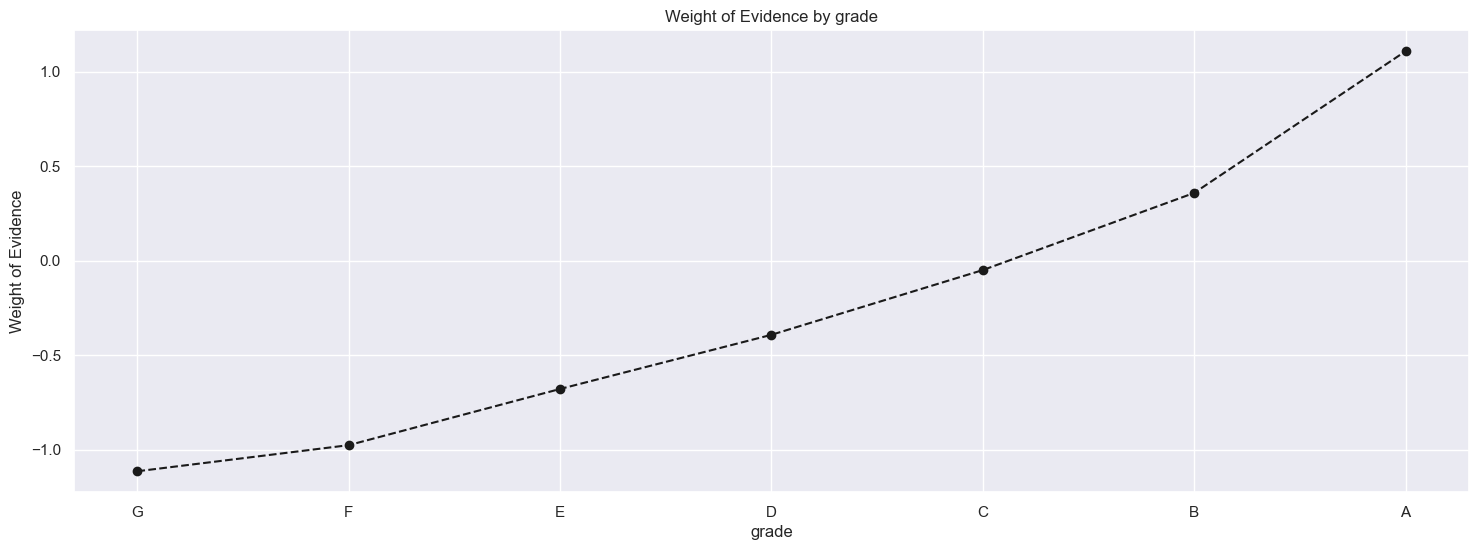

In [76]:
plot_by_woe(df_temp)

## 7. Tiền xử lý biến rời rạc (tiếp tục)
Tạo các biến phân loại cho các biến còn lại

In [77]:
# Phân tích biến 'home_ownership' và tính toán WoE, IV
# Áp dụng hàm woe_discrete để phân tích biến 'home_ownership'
# dựa trên biến mục tiêu 'good_bad' (trong df_targets_prepr).
# Kết quả được lưu trữ trong dataframe df_temp, bao gồm WoE, IV,
# và các thông tin thống kê khác.
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


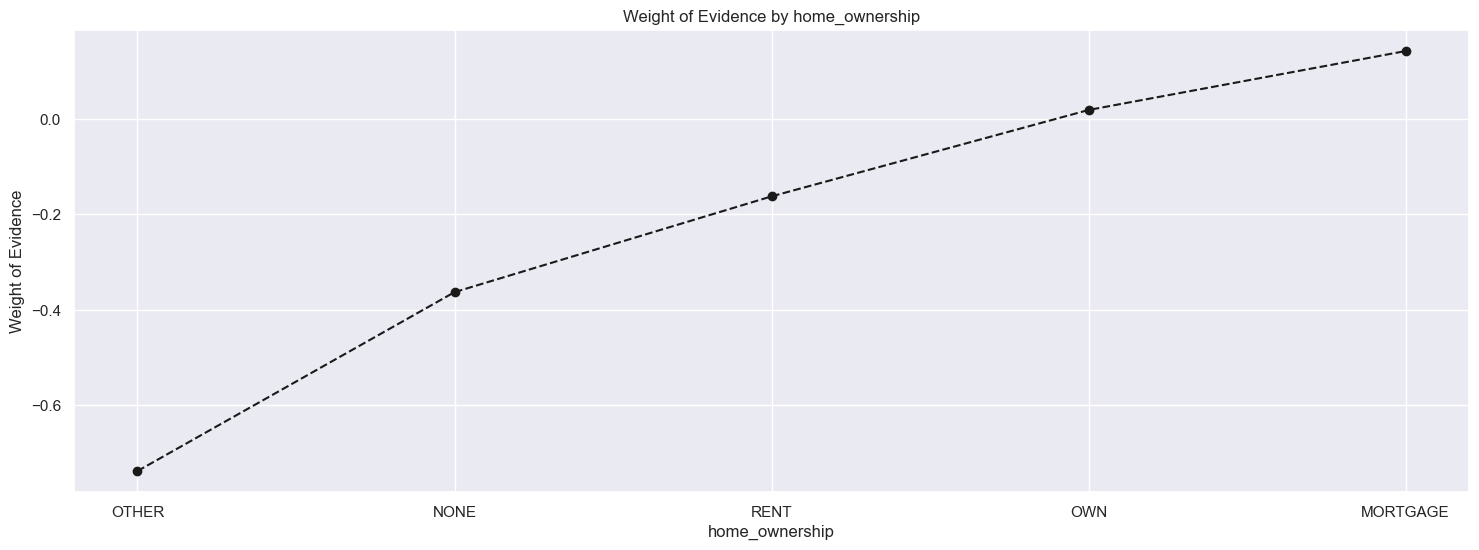

In [78]:
plot_by_woe(df_temp)

In [79]:
# Chúng ta tạo các biến rời rạc, lấy OTHER và NONE là rủi ro nhất, ngay sau đó là RENT và ANY là ít rủi ro nhất.
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                      df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [80]:
df_inputs_prepr['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [81]:
# Phân tích biến 'addr_state' và tính toán WoE, IV
# Áp dụng hàm woe_discrete để phân tích biến 'addr_state'
# dựa trên biến mục tiêu 'good_bad' (trong df_targets_prepr).
# Kết quả được lưu trữ trong dataframe df_temp, bao gồm WoE, IV,
# và các thông tin thống kê khác cho từng bang.
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


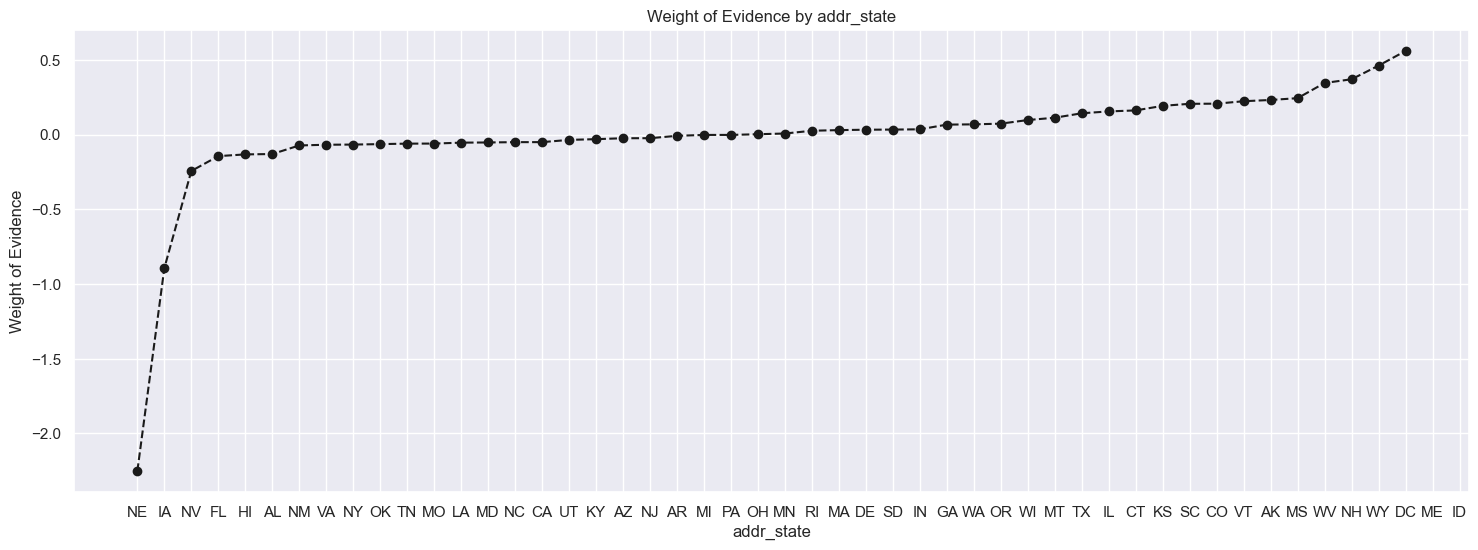

In [82]:
plot_by_woe(df_temp)

In [83]:
# Tạo cột addr_state:ND nếu chưa có (tránh lỗi)
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

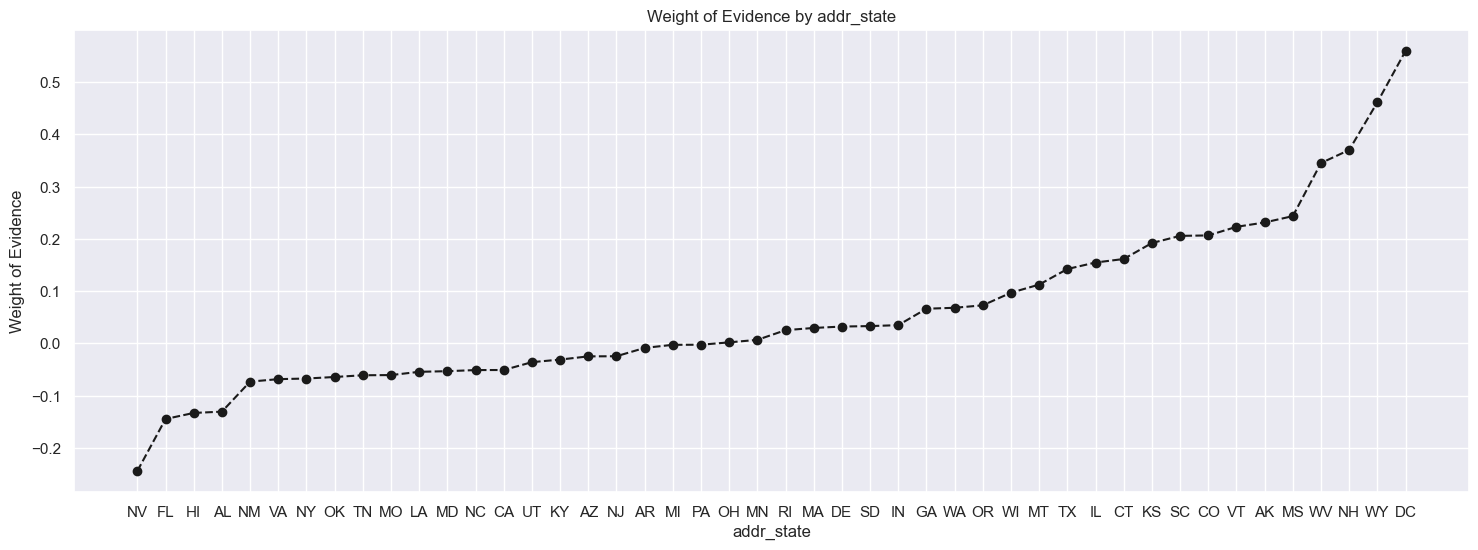

In [84]:
# Vẽ biểu đồ dựa trên trọng số, bỏ đi 2 bang có trọng số cao nhất và 2 bang có trọng số thấp nhất
plot_by_woe(df_temp.iloc[2: -2, : ])

## Ứng dụng Monte - Carlo vào cột grade

---




In [85]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


In [86]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def monte_carlo_woe_analysis(df, discrete_var, target_var, n_simulations=1000, sample_size=None):

    if sample_size is None:
        sample_size = len(df)

    # Lưu trữ kết quả
    woe_distributions = {}
    iv_values = []

    # Lấy các category riêng lẻ
    categories = df[discrete_var].unique()

    # Chạy mô phỏng Monte-Carlo
    for _ in tqdm(range(n_simulations)):
        indices = np.random.randint(0, len(df), size=sample_size)
        sample_df = df.iloc[indices]
        sample_target = target_var.iloc[indices]

        temp_result = woe_discrete(sample_df, discrete_var, sample_target)

        for cat in categories:
            if cat in temp_result[discrete_var].values:
                woe = temp_result.loc[temp_result[discrete_var] == cat, 'WoE'].values[0]
                woe_distributions.setdefault(cat, []).append(woe)

        iv_values.append(temp_result['IV'].iloc[0])

    # Tạo hai DataFrame riêng biệt cho WOE và IV
    woe_results = pd.DataFrame()
    for cat in categories:
        if cat in woe_distributions:
            woe_values = woe_distributions[cat]
            woe_results.loc[cat, 'WOE_Mean'] = np.mean(woe_values)
            woe_results.loc[cat, 'WOE_Std'] = np.std(woe_values)
            woe_results.loc[cat, 'WOE_5th'] = np.percentile(woe_values, 5)
            woe_results.loc[cat, 'WOE_95th'] = np.percentile(woe_values, 95)

    iv_results = pd.DataFrame(index=['Overall'])
    iv_results['IV_Mean'] = np.mean(iv_values)
    iv_results['IV_Std'] = np.std(iv_values)
    iv_results['IV_5th'] = np.percentile(iv_values, 5)
    iv_results['IV_95th'] = np.percentile(iv_values, 95)

    return woe_results, iv_results

def display_results(woe_results, iv_results):

    print("\nWOE Analysis by Category:")
    print("=" * 80)
    print(woe_results.round(6))

    print("\nInformation Value (IV) Analysis:")
    print("=" * 80)
    print(iv_results.round(6))

    return pd.concat([woe_results, iv_results])

In [88]:
# Chạy Monte Carlo simulation
woe_results, iv_results = monte_carlo_woe_analysis(
    df=df_inputs_prepr,
    discrete_var='grade',
    target_var=df_targets_prepr,
    n_simulations=1000
)

# In kết quả
print("\nKết quả Monte Carlo simulation:")
display_results(woe_results, iv_results)




100%|██████████| 1000/1000 [07:57<00:00,  2.09it/s]


Kết quả Monte Carlo simulation:

WOE Analysis by Category:
   WOE_Mean   WOE_Std   WOE_5th  WOE_95th
A  1.108575  0.020588  1.074119  1.141468
C -0.049273  0.008104 -0.062498 -0.036048
D -0.392472  0.009833 -0.408437 -0.375614
B  0.358546  0.009853  0.342511  0.375387
E -0.677760  0.014308 -0.701398 -0.654202
F -0.975675  0.022708 -1.011341 -0.938482
G -1.112755  0.043436 -1.182595 -1.041768

Information Value (IV) Analysis:
          IV_Mean    IV_Std   IV_5th   IV_95th
Overall  0.288978  0.005757  0.27952  0.298571


,WOE_Mean,WOE_Std,WOE_5th,WOE_95th,IV_Mean,IV_Std,IV_5th,IV_95th
A,1.108575,0.020588,1.074119,1.141468,NaN,NaN,NaN,NaN
C,-0.049273,0.008104,-0.062498,-0.036048,NaN,NaN,NaN,NaN
D,-0.392472,0.009833,-0.408437,-0.375614,NaN,NaN,NaN,NaN
B,0.358546,0.009853,0.342511,0.375387,NaN,NaN,NaN,NaN
E,-0.677760,0.014308,-0.701398,-0.654202,NaN,NaN,NaN,NaN
F,-0.975675,0.022708,-1.011341,-0.938482,NaN,NaN,NaN,NaN
G,-1.112755,0.043436,-1.182595,-1.041768,NaN,NaN,NaN,NaN
Overall,NaN,NaN,NaN,NaN,0.288978,0.005757,0.27952,0.298571


In [89]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


In [90]:
import pandas as pd
import numpy as np
from tqdm import tqdm

def monte_carlo_woe_analysis(df, discrete_var, target_var, n_simulations=1000, sample_size=None):

    if sample_size is None:
        sample_size = len(df)

    # Lưu trữ kết quả
    woe_distributions = {}
    iv_values = []

    # Lấy các category riêng lẻ
    categories = df[discrete_var].unique()

    # Chạy mô phỏng Monte-Carlo
    for _ in tqdm(range(n_simulations)):
        indices = np.random.randint(0, len(df), size=sample_size)
        sample_df = df.iloc[indices]
        sample_target = target_var.iloc[indices]

        temp_result = woe_discrete(sample_df, discrete_var, sample_target)

        for cat in categories:
            if cat in temp_result[discrete_var].values:
                woe = temp_result.loc[temp_result[discrete_var] == cat, 'WoE'].values[0]
                woe_distributions.setdefault(cat, []).append(woe)

        iv_values.append(temp_result['IV'].iloc[0])

    # Tạo hai DataFrame riêng biệt cho WOE và IV
    woe_results = pd.DataFrame()
    for cat in categories:
        if cat in woe_distributions:
            woe_values = woe_distributions[cat]
            woe_results.loc[cat, 'WOE_Mean'] = np.mean(woe_values)
            woe_results.loc[cat, 'WOE_Std'] = np.std(woe_values)
            woe_results.loc[cat, 'WOE_5th'] = np.percentile(woe_values, 5)
            woe_results.loc[cat, 'WOE_95th'] = np.percentile(woe_values, 95)

    iv_results = pd.DataFrame(index=['Overall'])
    iv_results['IV_Mean'] = np.mean(iv_values)
    iv_results['IV_Std'] = np.std(iv_values)
    iv_results['IV_5th'] = np.percentile(iv_values, 5)
    iv_results['IV_95th'] = np.percentile(iv_values, 95)

    return woe_results, iv_results

def display_results(woe_results, iv_results):

    print("\nWOE Analysis by Category:")
    print("=" * 80)
    print(woe_results.round(6))

    print("\nInformation Value (IV) Analysis:")
    print("=" * 80)
    print(iv_results.round(6))

    return pd.concat([woe_results, iv_results])

In [92]:
# Chạy Monte Carlo simulation
woe_results, iv_results = monte_carlo_woe_analysis(
    df=df_inputs_prepr,
    discrete_var='addr_state',
    target_var=df_targets_prepr,
    n_simulations=1000
)

# In kết quả
print("\nKết quả Monte Carlo simulation:")
display_results(woe_results, iv_results)

  0%|          | 0/1000 [00:00<?, ?it/s]

  3%|▎         | 29/1000 [00:14<08:19,  1.94it/s]c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 19%|█▉        | 193/1000 [01:28<06:03,  2.22it/s]c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
 21%|██        | 208/1000 [01:35<05:56,  2.22it/s]c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
100%|██████████| 1000/1000 [07:49<00:00,  2.13it/s]


Kết quả Monte Carlo simulation:

WOE Analysis by Category:
    WOE_Mean   WOE_Std   WOE_5th  WOE_95th
SC  0.208693  0.054015  0.124811  0.299226
NJ -0.023588  0.025781 -0.065387  0.018808
GA  0.066782  0.029619  0.019410  0.116332
MA  0.031570  0.034698 -0.022360  0.090928
CA -0.050755  0.011922 -0.070004 -0.029831
IL  0.154408  0.027270  0.109520  0.198823
NC -0.051121  0.029267 -0.098930 -0.001385
NY -0.066870  0.016696 -0.093569 -0.039191
TX  0.142972  0.018957  0.112737  0.173681
CT  0.163935  0.043876  0.091368  0.238626
FL -0.142788  0.017980 -0.171866 -0.112655
VA -0.068312  0.028682 -0.114424 -0.021502
UT -0.034301  0.059472 -0.130833  0.063393
AZ -0.024662  0.034303 -0.079740  0.034234
MD -0.054794  0.033039 -0.108481 -0.001739
WI  0.096455  0.048615  0.017193  0.181020
MI -0.000921  0.032768 -0.053600  0.054344
CO  0.206275  0.038459  0.145640  0.272986
TN -0.060769  0.044537 -0.131641  0.012842
IN  0.036250  0.044440 -0.032848  0.111922
AL -0.128774  0.044795 -0.200886 -0.0


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\_methods.py:185: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:4779: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\admin\AppData\Local\Programs\Python\Py

,WOE_Mean,WOE_Std,WOE_5th,WOE_95th,IV_Mean,IV_Std,IV_5th,IV_95th
SC,0.208693,0.054015,0.124811,0.299226,NaN,NaN,NaN,NaN
NJ,-0.023588,0.025781,-0.065387,0.018808,NaN,NaN,NaN,NaN
GA,0.066782,0.029619,0.019410,0.116332,NaN,NaN,NaN,NaN
MA,0.031570,0.034698,-0.022360,0.090928,NaN,NaN,NaN,NaN
CA,-0.050755,0.011922,-0.070004,-0.029831,NaN,NaN,NaN,NaN
IL,0.154408,0.027270,0.109520,0.198823,NaN,NaN,NaN,NaN
NC,-0.051121,0.029267,-0.098930,-0.001385,NaN,NaN,NaN,NaN
NY,-0.066870,0.016696,-0.093569,-0.039191,NaN,NaN,NaN,NaN
TX,0.142972,0.018957,0.112737,0.173681,NaN,NaN,NaN,NaN
CT,0.163935,0.043876,0.091368,0.238626,NaN,NaN,NaN,NaN
